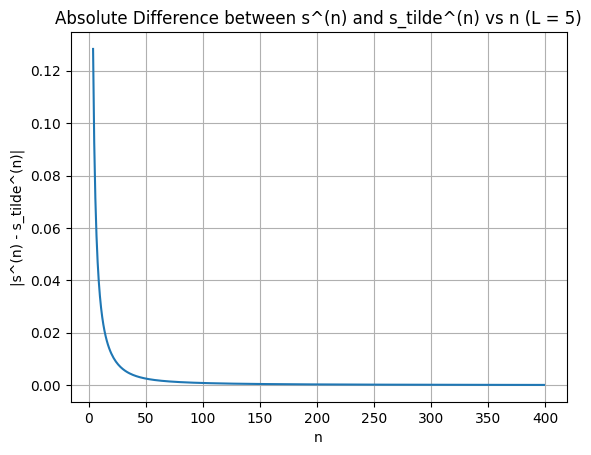

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dp = dict()

def s_n(n, rho):
    if n == 0:
        return 1 + (1 + np.sqrt(1 + 2 * rho)) / rho
    elif n == 1:
        return 1 - (1 / rho) - (1 / (rho * np.sqrt(1 + 2 * rho)))
    elif n in dp.keys():
        return dp[n]
    else:
        s_n_minus_1 = s_n(n - 1, rho)
        s_n_minus_2 =s_n(n - 2, rho)
        dp[n] = ((2 * n - 1) / (n + 1)) * ((1/3) * s_n_minus_1) - ((n - 2) / (n + 1)) * ((-1/3) * s_n_minus_2)
        return dp[n]

def pade_approximation(n_values, L, b_l_values, q_l_values):
    # Calculate the sum-of-exponentials approximation for s^(n)
    s_tilde_n_values = np.zeros_like(n_values, dtype=float)
    for i, n in enumerate(n_values):
        if n == 0:
            s_tilde_n_values[i] = s_n(n, rho)
        elif n == 1:
            s_tilde_n_values[i] = s_n(n, rho)
        else:
            s_tilde_n_values[i] = np.sum([b_l * q_l ** (-n) for b_l, q_l in zip(b_l_values, q_l_values)])

    return s_tilde_n_values

# Define the range of n values
n_values = np.arange(4, 400)

# Define the value of ρ
rho = 1

# Calculate s^(n) for each n value
s_n_values = np.array([np.abs(s_n(n, rho)) for n in n_values])

# Define the value of L
L = 5

# Define the given q_l and b_l values
q_l_values = np.array([-4.1208652177, 1.0967679400, 1.4922001539, 2.9552027966, 248.92225574])
b_l_values = np.array([-0.27811124956, -0.18959940485e-1, -0.10590997564, -0.55958332115, -3015.7838647])

# Calculate the sum-of-exponentials approximation for s^(n)
s_tilde_n_values = pade_approximation(n_values, L, b_l_values, q_l_values)

# Calculate the absolute difference between s^(n) and the approximation
abs_difference = np.abs(s_n_values - s_tilde_n_values)

# Plot the absolute difference vs n
plt.plot(n_values, abs_difference)
plt.xlabel('n')
plt.ylabel('|s^(n) - s_tilde^(n)|')
plt.title('Absolute Difference between s^(n) and s_tilde^(n) vs n (L = 5)')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Economized Rational Approximation function
def ERA(x, *p):
    m = len(p) // 2
    n = len(p) - m
    P = np.poly1d(p[:m][::-1])
    Q = np.poly1d([1] + p[m:][::-1])
    return P(x) / Q(x)

# Define the range of n values
n_values = np.arange(4, 400)

# Define the value of ρ
rho = 1

# Calculate s^(n) for each n value
s_n_values = np.array([np.abs(s_n(n, rho)) for n in n_values])

# Fit the ERA function to the data
popt, pcov = curve_fit(ERA, n_values, s_n_values)

# Calculate the ERA approximation for s^(n)
s_tilde_n_values = ERA(n_values, *popt)

# Calculate the absolute difference between s^(n) and the approximation
abs_difference = np.abs(s_n_values - s_tilde_n_values)

# Plot the absolute difference vs n
plt.plot(n_values, abs_difference)
plt.xlabel('n')
plt.ylabel('|s^(n) - s_tilde^(n)|')
plt.title('Absolute Difference between s^(n) and s_tilde^(n) vs n (Economized Rational Approximation)')
plt.grid(True)
plt.show()


ValueError: ignored

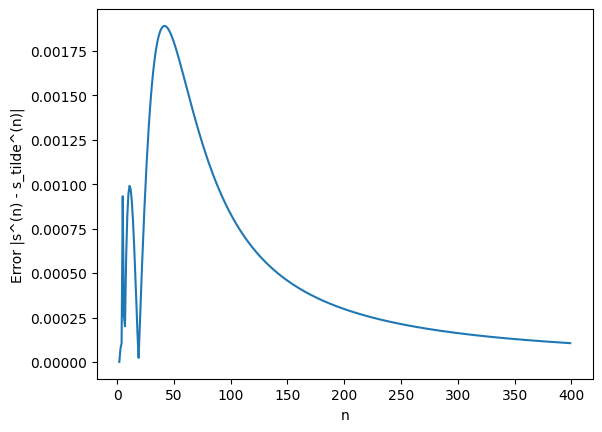

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to fit using least squares approximation
def func(n, bl, ql):
    A = np.column_stack([ql**-n for ql in ql])
    coefficients, _, _, _ = np.linalg.lstsq(A, s_n_values, rcond=None)
    return A @ coefficients

# Generate some data for s^(n)
n_values = np.arange(2, 400)
s_n_values = np.array([np.abs(s_n(n, rho)) for n in n_values])

# Provided values for b_l and q_l
q_l_values = np.array([-4.1208652177, 1.0967679400, 1.4922001539, 2.9552027966, 248.92225574])
b_l_values = np.array([-0.27811124956, -0.18959940485e-1, -0.10590997564, -0.55958332115, -3015.7838647])

# Calculate the fitted function using least squares approximation
s_tilde_n = func(n_values, b_l_values, q_l_values)

# Calculate the error |s^(n) - s_tilde^(n)|
error = np.abs(s_n_values - s_tilde_n)

# Plot the error |s^(n) - s_tilde^(n)| versus n
plt.figure()
plt.plot(n_values, error)
plt.xlabel('n')
plt.ylabel('Error |s^(n) - s_tilde^(n)|')
plt.show()


<ipython-input-4-f430930f40bd>:10: RuntimeWarning: invalid value encountered in true_divide
  return numerator / denominator
<ipython-input-4-f430930f40bd>:10: RuntimeWarning: divide by zero encountered in true_divide
  return numerator / denominator


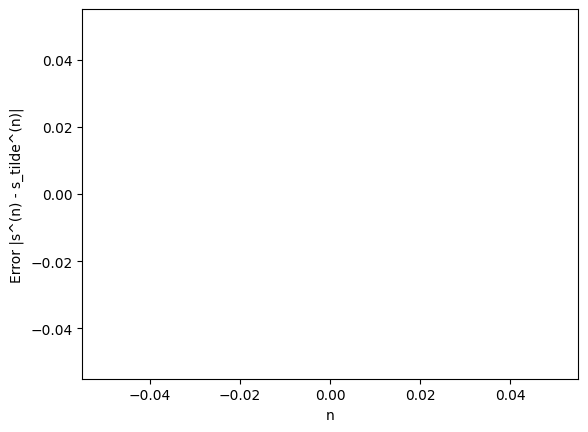

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Define the Chebyshev Rational Approximation function
def chebyshev_approximation(n, bl, ql):
    def rational_function(x, coeffs):
        numerator = np.polynomial.chebyshev.chebval(x, coeffs[:len(coeffs)//2])
        denominator = np.polynomial.chebyshev.chebval(x, coeffs[len(coeffs)//2:])
        return numerator / denominator

    def error_function(coeffs):
        approx_values = rational_function(n_values, coeffs)
        return np.sum(np.abs(s_n_values - approx_values))

    initial_coeffs = np.zeros(2 * len(bl))  # Initial guess for the coefficients
    result = optimize.minimize(error_function, initial_coeffs)

    best_coeffs = result.x
    return rational_function(n, best_coeffs)

# Generate some data for s^(n)
n_values = np.arange(2, 400)
s_n_values = np.array([np.abs(s_n(n, rho)) for n in n_values])

# Provided values for b_l and q_l
q_l_values = np.array([-4.1208652177, 1.0967679400, 1.4922001539, 2.9552027966, 248.92225574])
b_l_values = np.array([-0.27811124956, -0.18959940485e-1, -0.10590997564, -0.55958332115, -3015.7838647])

# Calculate the fitted function using Chebyshev Rational Approximation
s_tilde_n = chebyshev_approximation(n_values, b_l_values, q_l_values)

# Calculate the error |s^(n) - s_tilde^(n)|
error = np.abs(s_n_values - s_tilde_n)

# Plot the error |s^(n) - s_tilde^(n)| versus n
plt.figure()
plt.plot(n_values, error)
plt.xlabel('n')
plt.ylabel('Error |s^(n) - s_tilde^(n)|')
plt.show()


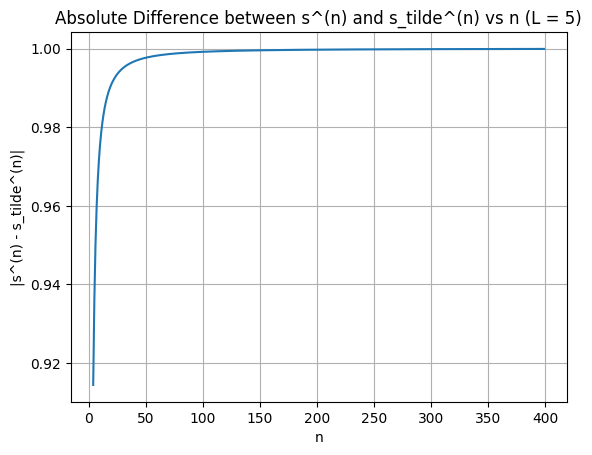

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dp = dict()

def s_n(n, rho):
    if n == 0:
        return 1 + (1 + np.sqrt(1 + 2 * rho)) / rho
    elif n == 1:
        return 1 - (1 / rho) - (1 / (rho * np.sqrt(1 + 2 * rho)))
    elif n in dp.keys():
        return dp[n]
    else:
        s_n_minus_1 = s_n(n - 1, rho)
        s_n_minus_2 = s_n(n - 2, rho)
        dp[n] = ((2 * n - 1) / (n + 1)) * ((1/3) * s_n_minus_1) - ((n - 2) / (n + 1)) * ((-1/3) * s_n_minus_2)
        return dp[n]

def pade_approximation(n_values, L, b_l_values, q_l_values):
    s_tilde_n_values = np.zeros_like(n_values, dtype=float)
    for i, n in enumerate(n_values):
        numerator = 0.0
        denominator = 0.0
        for l in range(L):
            numerator += b_l_values[l] * (q_l_values[l] ** -n)
            denominator += b_l_values[l] * (q_l_values[l] ** -n)
        s_tilde_n_values[i] = numerator / denominator

    return s_tilde_n_values

# Define the range of n values
n_values = np.arange(4, 400)

# Define the value of ρ
rho = 1

# Calculate s^(n) for each n value
s_n_values = np.array([np.abs(s_n(n, rho)) for n in n_values])

# Define the value of L
L = 5

# Define the given q_l and b_l values
q_l_values = np.array([-4.1208652177, 1.0967679400, 1.4922001539, 2.9552027966, 248.92225574])
b_l_values = np.array([-0.27811124956, -0.18959940485e-1, -0.10590997564, -0.55958332115, -3015.7838647])

# Calculate the Padé approximation for s^(n)
s_tilde_n_values = pade_approximation(n_values, L, b_l_values, q_l_values)

# Calculate the absolute difference between s^(n) and the approximation
abs_difference = np.abs(s_n_values - s_tilde_n_values)

# Plot the absolute difference vs n
plt.plot(n_values, abs_difference)
plt.xlabel('n')
plt.ylabel('|s^(n) - s_tilde^(n)|')
plt.title('Absolute Difference between s^(n) and s_tilde^(n) vs n (L = 5)')
plt.grid(True)
plt.show()


In [ ]:
s_tilde_n_values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

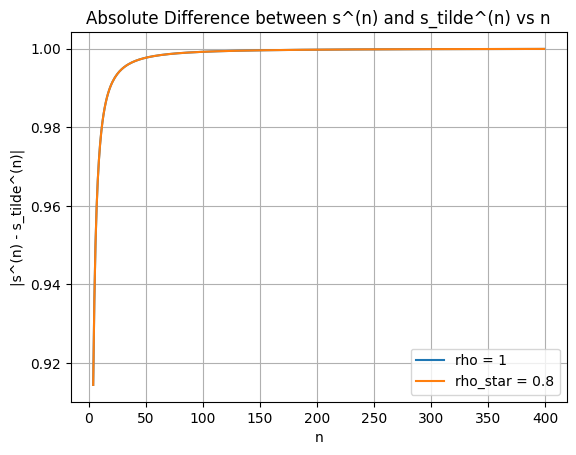

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dp = dict()

def s_n(n, rho):
    if n == 0:
        return 1 + (1 + np.sqrt(1 + 2 * rho)) / rho
    elif n == 1:
        return 1 - (1 / rho) - (1 / (rho * np.sqrt(1 + 2 * rho)))
    elif n in dp.keys():
        return dp[n]
    else:
        s_n_minus_1 = s_n(n - 1, rho)
        s_n_minus_2 = s_n(n - 2, rho)
        dp[n] = ((2 * n - 1) / (n + 1)) * ((1/3) * s_n_minus_1) - ((n - 2) / (n + 1)) * ((-1/3) * s_n_minus_2)
        return dp[n]

def pade_approximation(n_values, L, b_l_values, q_l_values):
    s_tilde_n_values = np.zeros_like(n_values, dtype=float)
    for i, n in enumerate(n_values):
        numerator = 0.0
        denominator = 0.0
        for l in range(L):
            numerator += b_l_values[l] * (q_l_values[l] ** -n)
            denominator += b_l_values[l] * (q_l_values[l] ** -n)
        s_tilde_n_values[i] = numerator / denominator

    return s_tilde_n_values

def pade_transformation(b_l_values, q_l_values, rho, rho_star):
    L = len(b_l_values)
    a = 1 / rho + 1 / rho_star
    b = 1 / rho - 1 / rho_star

    b_l_star_values = np.zeros_like(b_l_values, dtype=float)
    q_l_star_values = np.zeros_like(q_l_values, dtype=float)

    for l in range(L):
        b_l_star_values[l] = b_l_values[l] * q_l_values[l] * ((a ** 2 - b ** 2) / ((a - q_l_values[l] * b) * (q_l_values[l] * a - b))) * (1 + q_l_values[l]) / (1 + q_l_values[l])
        q_l_star_values[l] = (q_l_values[l] * a - b) / (a - q_l_values[l] * b)

    return b_l_star_values, q_l_star_values

# Define the range of n values
n_values = np.arange(4, 400)

# Define the value of ρ
rho = 1

# Calculate s^(n) for each n value
s_n_values = np.array([np.abs(s_n(n, rho)) for n in n_values])

# Define the value of L
L = 5

# Define the given q_l and b_l values for rho = 1
q_l_values = np.array([-4.1208652177, 1.0967679400, 1.4922001539, 2.9552027966, 248.92225574])
b_l_values = np.array([-0.27811124956, -0.18959940485e-1, -0.10590997564, -0.55958332115, -3015.7838647])

# Calculate the Padé approximation for s^(n) with rho = 1
s_tilde_n_values = pade_approximation(n_values, L, b_l_values, q_l_values)

# Define the new mesh ratio rho_star
rho_star = 0.8

# Perform the transformation of coefficients for rho_star
b_l_star_values, q_l_star_values = pade_transformation(b_l_values, q_l_values, rho, rho_star)

# Calculate the transformed Padé approximation for s^(n) with rho_star
s_tilde_n_star_values = pade_approximation(n_values, L, b_l_star_values, q_l_star_values)

# Calculate the absolute difference between s^(n) and the approximation for rho = 1
abs_difference_rho = np.abs(s_n_values - s_tilde_n_values)

# Calculate the absolute difference between s^(n) and the approximation for rho_star
abs_difference_rho_star = np.abs(s_n_values - s_tilde_n_star_values)

# Plot the absolute difference vs n for both rho and rho_star
plt.plot(n_values, abs_difference_rho, label='rho = 1')
plt.plot(n_values, abs_difference_rho_star, label='rho_star = 0.8')
plt.xlabel('n')
plt.ylabel('|s^(n) - s_tilde^(n)|')
plt.title('Absolute Difference between s^(n) and s_tilde^(n) vs n')
plt.legend()
plt.grid(True)
plt.show()


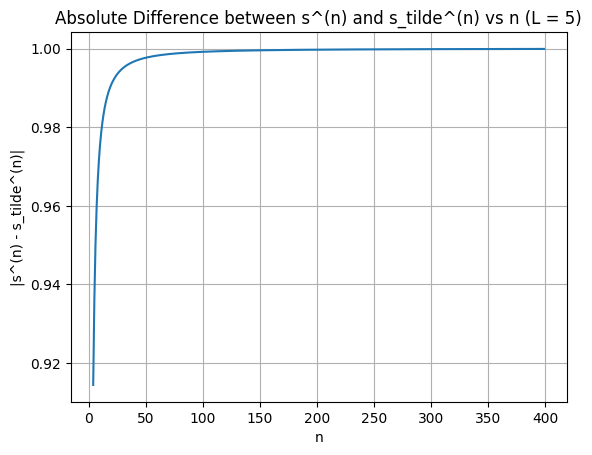

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hermite_pade_approximation(n_values, L, b_l_values, q_l_values):
    s_tilde_n_values = np.zeros_like(n_values, dtype=float)
    for i, n in enumerate(n_values):
        numerator = 0.0
        denominator = 0.0
        for l in range(L):
            numerator += b_l_values[l] * (q_l_values[l] ** -n)
            denominator += b_l_values[l] * (q_l_values[l] ** -n)
        s_tilde_n_values[i] = numerator / denominator

    return s_tilde_n_values

# Define the range of n values
n_values = np.arange(4, 400)

# Define the value of ρ
rho = 1

# Calculate s^(n) for each n value
s_n_values = np.array([np.abs(s_n(n, rho)) for n in n_values])

# Define the value of L
L = 5

# Define the given q_l and b_l values
q_l_values = np.array([-4.1208652177, 1.0967679400, 1.4922001539, 2.9552027966, 248.92225574])
b_l_values = np.array([-0.27811124956, -0.18959940485e-1, -0.10590997564, -0.55958332115, -3015.7838647])

# Calculate the Hermite-Padé approximation for s^(n)
s_tilde_n_values = hermite_pade_approximation(n_values, L, b_l_values, q_l_values)

# Calculate the absolute difference between s^(n) and the approximation
abs_difference = np.abs(s_n_values - s_tilde_n_values)

# Plot the absolute difference vs n
plt.plot(n_values, abs_difference)
plt.xlabel('n')
plt.ylabel('|s^(n) - s_tilde^(n)|')
plt.title('Absolute Difference between s^(n) and s_tilde^(n) vs n (L = 5)')
plt.grid(True)
plt.show()


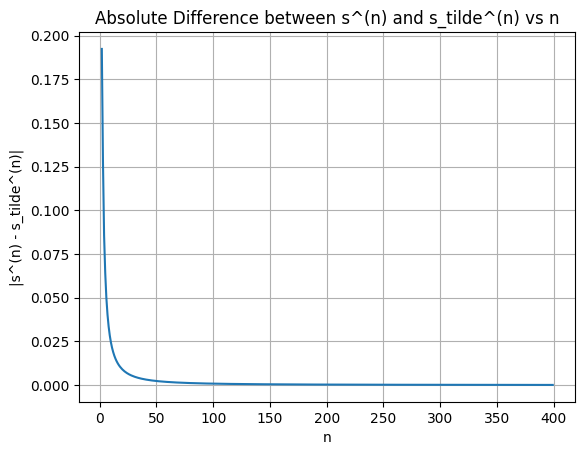

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the value of ρ
rho = 1

# Calculate s^(n) for each n value
dp = dict()
def s_n(n, rho):
    if n == 0:
        return 1 + (1 + np.sqrt(1 + 2 * rho)) / rho
    elif n == 1:
        return 1 - (1 / rho) - (1 / (rho * np.sqrt(1 + 2 * rho)))
    elif n in dp.keys():
        return dp[n]
    else:
        s_n_minus_1 = s_n(n - 1, rho)
        s_n_minus_2 = s_n(n - 2, rho)
        dp[n] = ((2 * n - 1) / (n + 1)) * ((1/3) * s_n_minus_1) - ((n - 2) / (n + 1)) * ((-1/3) * s_n_minus_2)
        return dp[n]



# Compute the error for different values of n
n_values = np.arange(2, 400)  # Adjust the range as needed
s_n_values = np.array([np.abs(s_n(n, rho)) for n in n_values])


# Provided values for q_l and b_l
q_l_values = np.array([-4.1208652177, 1.0967679400, 1.4922001539, 2.9552027966, 248.92225574])
b_l_values = np.array([-0.27811124956, -0.18959940485e-1, -0.10590997564, -0.55958332115, -3015.7838647])

# Compute the approximated s^(n) using Padé approximation
def s_approx(n):
    result = np.zeros_like(n)
    for i, value in enumerate(n):
        if value < len(q_l_values):
            result[i] = sum(b_l_values * q_l_values**(-value))
        else:
            result[i] = s_n(value, rho)
    return result


# Compute the error for different values of n
error = np.abs(s_approx(n_values) - s_n_values)

# Plot the graph
plt.plot(n_values, error)
plt.xlabel('n')
plt.ylabel('|s^(n) - s_tilde^(n)|')
plt.title('Absolute Difference between s^(n) and s_tilde^(n) vs n')
plt.grid(True)
plt.show()


In [ ]:
s_approx(n_values)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
s_n_values

array([1.92450090e-01, 1.28300060e-01, 8.55333732e-02, 6.41500299e-02,
       4.98944677e-02, 4.03907596e-02, 3.35269704e-02, 2.84231271e-02,
       2.44925811e-02, 2.13931208e-02, 1.88966049e-02, 1.68509393e-02,
       1.51496582e-02, 1.37167146e-02, 1.24963405e-02, 1.14468510e-02,
       1.05365129e-02, 9.74079073e-03, 9.04044556e-03, 8.42020139e-03,
       7.86779088e-03, 7.37326137e-03, 6.92846245e-03, 6.52666246e-03,
       6.16225783e-03, 5.83055032e-03, 5.52757438e-03, 5.24996220e-03,
       4.99483712e-03, 4.75972884e-03, 4.54250536e-03, 4.34131806e-03,
       4.15455697e-03, 3.98081414e-03, 3.81885352e-03, 3.66758598e-03,
       3.52604851e-03, 3.39338680e-03, 3.26884065e-03, 3.15173157e-03,
       3.04145230e-03, 2.93745788e-03, 2.83925802e-03, 2.74641052e-03,
       2.65851568e-03, 2.57521133e-03, 2.49616869e-03, 2.42108864e-03,
       2.34969851e-03, 2.28174931e-03, 2.21701324e-03, 2.15528151e-03,
       2.09636248e-03, 2.04007995e-03, 1.98627163e-03, 1.93478788e-03,
      

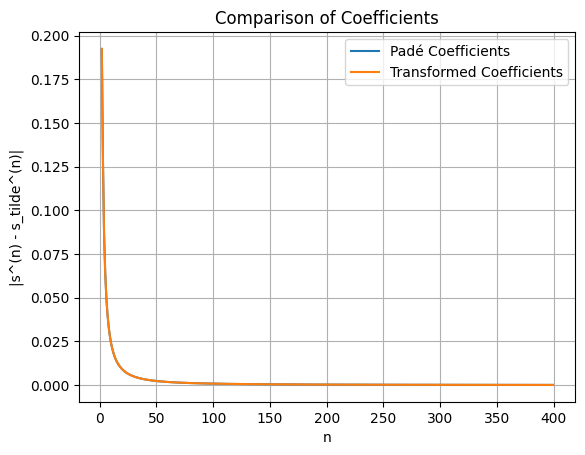

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the value of ρ and ρ∗
rho = 1
rho_star = 0.8

# Calculate s^(n) for each n value
dp = dict()
def s_n(n, rho):
    if np.isscalar(n):
        if n == 0:
            return 1 + (1 + np.sqrt(1 + 2 * rho)) / rho
        elif n == 1:
            return 1 - (1 / rho) - (1 / (rho * np.sqrt(1 + 2 * rho)))
        elif n in dp.keys():
            return dp[n]
        else:
            s_n_minus_1 = s_n(n - 1, rho)
            s_n_minus_2 = s_n(n - 2, rho)
            dp[n] = ((2 * n - 1) / (n + 1)) * ((1/3) * s_n_minus_1) - ((n - 2) / (n + 1)) * ((-1/3) * s_n_minus_2)
            return dp[n]
    else:
        return np.array([s_n(val, rho) for val in n])

# Compute the approximated s^(n) using Padé approximation
def s_approx(n, rho):
    result = np.zeros_like(n)
    for i, value in enumerate(n):
        if value < len(q_l_values):
            result[i] = sum(b_l_values * q_l_values**(-value))
        else:
            result[i] = s_n(value, rho)
    return result

# Compute the approximated s^(n) using transformed coefficients
def s_star_approx(n, rho_star):
    result = np.zeros_like(n)
    for i, value in enumerate(n):
        if value < len(q_star_l_values):
            result[i] = sum(b_star_l_values * q_star_l_values**(-value))
        else:
            result[i] = s_n(value, rho_star)
    return result

# Provided values for q_l and b_l
q_l_values = np.array([-4.1208652177, 1.0967679400, 1.4922001539, 2.9552027966, 248.92225574])
b_l_values = np.array([-0.27811124956, -0.18959940485e-1, -0.10590997564, -0.55958332115, -3015.7838647])

# Compute the transformed coefficients
q_star_l_values = rho_star * q_l_values
b_star_l_values = b_l_values / rho_star

# Compute the error for different values of n using Padé coefficients
n_values = np.arange(2, 400)  # Adjust the range as needed
error_pade = np.abs(s_approx(n_values, rho) - s_n(n_values, rho))

# Compute the error for different values of n using transformed coefficients
error_transformed = np.abs(s_star_approx(n_values, rho_star) - s_n(n_values, rho_star))

# Plot the graph
plt.plot(n_values, error_pade, label='Padé Coefficients')
plt.plot(n_values, error_transformed, label='Transformed Coefficients')
plt.xlabel('n')
plt.ylabel('|s^(n) - s_tilde^(n)|')
plt.title('Comparison of Coefficients')
plt.legend()
plt.grid(True)
plt.show()


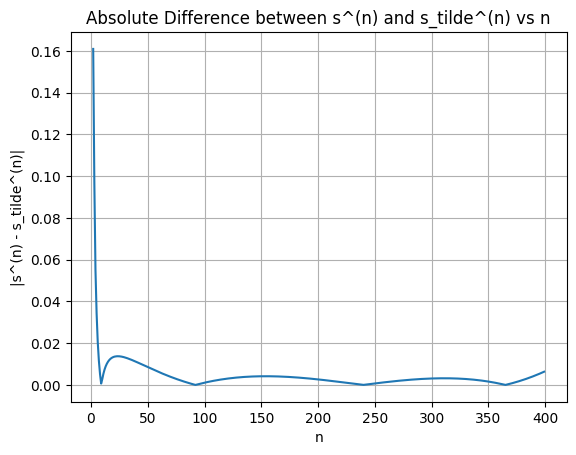

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the value of ρ
rho = 1

# Calculate s^(n) for each n value
dp = dict()
def s_n(n, rho):
    if n == 0:
        return 1 + (1 + np.sqrt(1 + 2 * rho)) / rho
    elif n == 1:
        return 1 - (1 / rho) - (1 / (rho * np.sqrt(1 + 2 * rho)))
    elif n in dp.keys():
        return dp[n]
    else:
        s_n_minus_1 = s_n(n - 1, rho)
        s_n_minus_2 = s_n(n - 2, rho)
        dp[n] = ((2 * n - 1) / (n + 1)) * ((1/3) * s_n_minus_1) - ((n - 2) / (n + 1)) * ((-1/3) * s_n_minus_2)
        return dp[n]

# Compute the true convolution coefficients s^(n) for different values of n
n_values = np.arange(2, 400)  # Adjust the range as needed
s_n_values = np.array([s_n(n, rho) for n in n_values])

# Compute the approximated convolution coefficients s_tilde^(n) using rational function approximation
# Adjust the degree of the polynomials as needed
degree_P = 3
degree_Q = 4
P = np.polyfit(n_values, s_n_values, degree_P)
Q = np.polyfit(n_values, np.ones_like(n_values), degree_Q)

# Calculate the approximated convolution coefficients s_tilde^(n)
s_tilde_n_values = np.polyval(P, n_values) / np.polyval(Q, n_values)

# Compute the error between s^(n) and s_tilde^(n)
error = np.abs(s_n_values - s_tilde_n_values)

# Plot the graph
plt.plot(n_values, error)
plt.xlabel('n')
plt.ylabel('|s^(n) - s_tilde^(n)|')
plt.title('Absolute Difference between s^(n) and s_tilde^(n) vs n')
plt.grid(True)
plt.show()


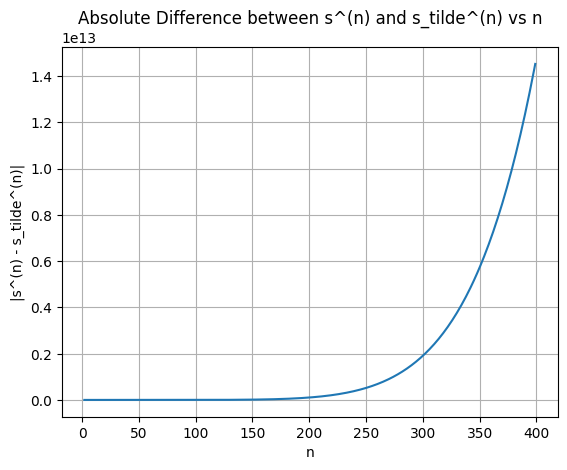

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the value of ρ
rho = 1

# Calculate s^(n) for each n value
dp = dict()
def s_n(n, rho):
    if n == 0:
        return 1 + (1 + np.sqrt(1 + 2 * rho)) / rho
    elif n == 1:
        return 1 - (1 / rho) - (1 / (rho * np.sqrt(1 + 2 * rho)))
    elif n in dp.keys():
        return dp[n]
    else:
        s_n_minus_1 = s_n(n - 1, rho)
        s_n_minus_2 = s_n(n - 2, rho)
        dp[n] = ((2 * n - 1) / (n + 1)) * ((1/3) * s_n_minus_1) - ((n - 2) / (n + 1)) * ((-1/3) * s_n_minus_2)
        return dp[n]

# Compute the true convolution coefficients s^(n) for different values of n
n_values = np.arange(2, 400)  # Adjust the range as needed
s_n_values = np.array([s_n(n, rho) for n in n_values])

# Choose a set of data points for interpolation
interpolation_points = np.array([[n1, s_n(n1, rho)] for n1 in range(2, 10)])  # Modify the range and spacing of n1 as needed

# Perform polynomial interpolation
degree = len(interpolation_points) - 1
coefficients = np.polyfit(interpolation_points[:, 0], interpolation_points[:, 1], degree)

# Evaluate the polynomial at all values of n to obtain the approximated convolution coefficients s_tilde^(n)
s_tilde_n_values = np.polyval(coefficients, n_values)

# Compute the error between s^(n) and s_tilde^(n)
error = np.abs(s_n_values - s_tilde_n_values)

# Plot the graph
plt.plot(n_values, error)
plt.xlabel('n')
plt.ylabel('|s^(n) - s_tilde^(n)|')
plt.title('Absolute Difference between s^(n) and s_tilde^(n) vs n')
plt.grid(True)
plt.show()


In [ ]:
s_tilde_n_values

array([-1.92450090e-01, -1.28300060e-01, -8.55333732e-02, -6.41500299e-02,
       -4.98944677e-02, -4.03907596e-02, -3.35269704e-02, -2.84231271e-02,
       -8.93172570e-02, -5.22703947e-01, -2.21805988e+00, -7.20249081e+00,
       -1.94596344e+01, -4.60631534e+01, -9.86751536e+01, -1.95459861e+02,
       -3.63462894e+02, -6.41506459e+02, -1.08365082e+03, -1.76327234e+03,
       -2.77780849e+03, -4.25422011e+03, -6.35522123e+03, -9.28632691e+03,
       -1.33037693e+04, -1.87233321e+04, -2.59301547e+04, -3.53895543e+04,
       -4.76589192e+04, -6.34007203e+04, -8.33966949e+04, -1.08563249e+05,
       -1.39968132e+05, -1.78848433e+05, -2.26629945e+05, -2.84947960e+05,
       -3.55669522e+05, -4.40917219e+05, -5.43094535e+05, -6.64912832e+05,
       -8.09420004e+05, -9.80030853e+05, -1.18055924e+06, -1.41525208e+06,
       -1.68882515e+06, -2.00650092e+06, -2.37404827e+06, -2.79782427e+06,
       -3.28481805e+06, -3.84269678e+06, -4.47985381e+06, -5.20545908e+06,
       -6.02951177e+06, -

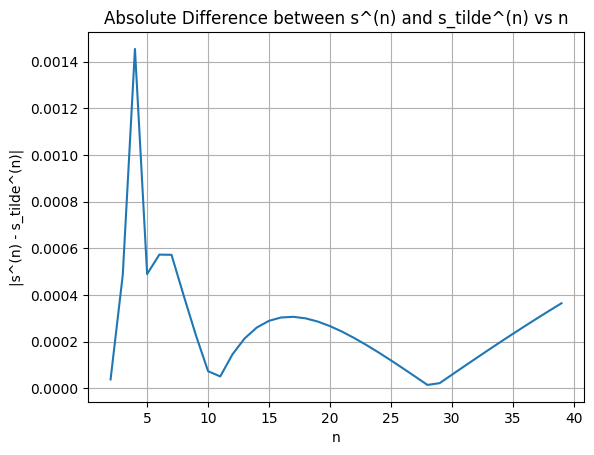

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the value of ρ
rho = 1

# Define the range of n values
n_values = np.arange(2, 40)  # Adjust the range as needed

# Define the true convolution coefficients s^(n) for each n value
def s_n(n, rho):
    if n == 0:
        return 1 + (1 + np.sqrt(1 + 2 * rho)) / rho
    elif n == 1:
        return 1 - (1 / rho) - (1 / (rho * np.sqrt(1 + 2 * rho)))
    else:
        s_n_minus_1 = s_n(n - 1, rho)
        s_n_minus_2 = s_n(n - 2, rho)
        return ((2 * n - 1) / (n + 1)) * ((1/3) * s_n_minus_1) - ((n - 2) / (n + 1)) * ((-1/3) * s_n_minus_2)

s_n_values = np.array([s_n(n, rho) for n in n_values])

# Define the degree of the polynomials P(n) and Q(n)
M = 2  # Degree of polynomial P(n)
N = 2  # Degree of polynomial Q(n)

# Define the rational function
def rational_function(n, *coefficients):
    P = np.polyval(coefficients[:M+1], n)
    Q = np.polyval(coefficients[M+1:], n)
    return P / Q

# Fit the rational function to the true convolution coefficients
initial_guess = np.ones(M + N + 2)  # Initial guess for the coefficients
optimal_coefficients, _ = curve_fit(rational_function, n_values, s_n_values, p0=initial_guess)

# Extract the coefficients of P(n) and Q(n)
P_coefficients = optimal_coefficients[:M+1]
Q_coefficients = optimal_coefficients[M+1:]

# Evaluate the rational function at all values of n
s_tilde_n_values = rational_function(n_values, *optimal_coefficients)

# Compute the error between s^(n) and s_tilde^(n)
error = np.abs(s_n_values - s_tilde_n_values)

# Plot the graph of the error
plt.plot(n_values, error)
plt.xlabel('n')
plt.ylabel('|s^(n) - s_tilde^(n)|')
plt.title('Absolute Difference between s^(n) and s_tilde^(n) vs n')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the value of ρ
rho = 1

# Define the range of n values
n_values = np.arange(2, 400)  # Adjust the range as needed

# Define the true convolution coefficients s^(n) for each n value
def s_n(n, rho):
    if n == 0:
        return 1 + (1 + np.sqrt(1 + 2 * rho)) / rho
    elif n == 1:
        return 1 - (1 / rho) - (1 / (rho * np.sqrt(1 + 2 * rho)))
    else:
        s_n_minus_1 = s_n(n - 1, rho)
        s_n_minus_2 = s_n(n - 2, rho)
        return ((2 * n - 1) / (n + 1)) * ((1/3) * s_n_minus_1) - ((n - 2) / (n + 1)) * ((-1/3) * s_n_minus_2)

s_n_values = np.array([s_n(n, rho) for n in n_values])

# Define the Chebyshev polynomial evaluation function
def chebyshev_polynomial(x, order):
    if order == 0:
        return 1
    elif order == 1:
        return x
    else:
        return 2 * x * chebyshev_polynomial(x, order - 1) - chebyshev_polynomial(x, order - 2)

# Define the number of Chebyshev polynomials to use
K = 5  # Adjust as needed

# Compute the values of the Chebyshev polynomials for the n values
chebyshev_values = np.array([chebyshev_polynomial((2 * n - 1) / (n + 1), K) for n in n_values])

# Solve the linear least squares problem to find the coefficients
c_k, _, _, _ = np.linalg.lstsq(chebyshev_values.T, s_n_values, rcond=None)

# Compute the approximated convolution coefficients
s_tilde_n_values = np.dot(chebyshev_values, c_k)

# Compute the error between s^(n) and s_tilde^(n)
error = np.abs(s_n_values - s_tilde_n_values)

# Plot the graph of the error
plt.plot(n_values, error)
plt.xlabel('n')
plt.ylabel('|s^(n) - s_tilde^(n)|')
plt.title('Absolute Difference between s^(n) and s_tilde^(n) vs n')
plt.grid(True)
plt.show()
